<a href="https://colab.research.google.com/github/cheungkelly/data301/blob/main/Day_20_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`There is no way to know k = ? is better`

# K-Means Clustering

Use scikit-learn whenever possible.

In [ ]:
import numpy as np
import pandas as pd

## Penguins data



Recall the Palmer penguins data set.

In [ ]:
df_penguins = pd.read_csv("https://dlsun.github.io/stats112/data/penguins.csv")
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
df_penguins["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

We'll cluster the penguins based on two variables, the bill depth and flipper length. Based on the scatterplot below, how many clusters do you think there are?

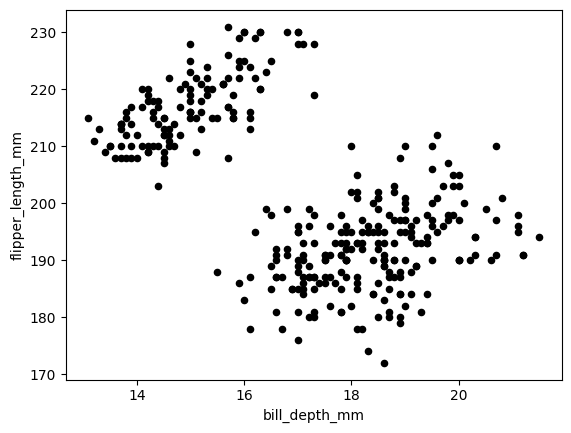

In [ ]:
X_train = df_penguins[["bill_depth_mm", "flipper_length_mm"]].dropna()
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     color="black");

1\. Use K-means clustering to cluster the penguins into 2 clusters based on bill depth and flipper length. Do NOT standardize the features first. Make a scatterplot with the points colored based on cluster assignment. Is this what you expected the clusters to be?

,bill_depth_mm,flipper_length_mm
blue,19.0,201.0
orange,14.3,210.0


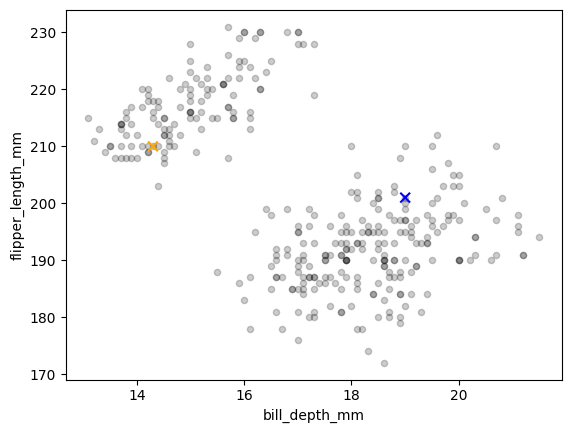

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
# Initialize 2 centroids at random from the data.
centroids = X_train.sample(2)

# Call the two clusters "blue" and "orange".
centroids.index = ["blue", "orange"]

# Plot these centroids as "X"s on the scatter plot
ax = X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                          color="black", alpha=0.2)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm", marker="x", s = 50,
                       color=centroids.index, ax=ax)

centroids

2\. Use K-means clustering to cluster the penguins into 2 clusters based on bill depth and flipper length. STANDARDIZE the features first. Make a scatterplot with the points colored based on cluster assignment. Is this what you expected the clusters to be? Which model is more appropriate---with or without standardized features?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.61779724, -0.65086942],
       [-1.09998045,  1.15886506]])

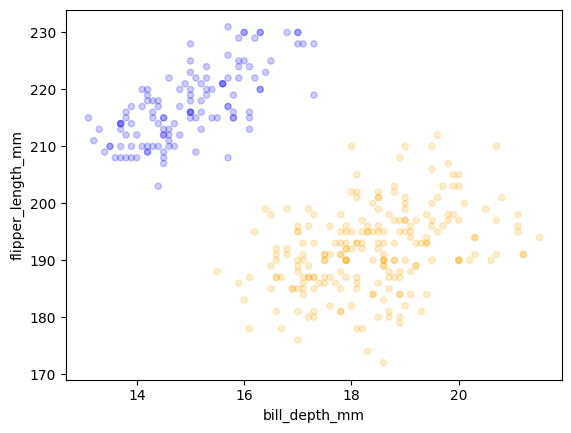

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X_train)

model = KMeans(n_clusters=2)
model.fit(X_train_std)

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue"
})

X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2)

model.cluster_centers_

`Standardization turns out not to matter much for the dataset because the variables are on fairly similar scales.`

3\. Use K-means clustering to cluster the penguins into 3 clusters based on bill depth and flipper length. Standardize the features first. Make a scatterplot with the points colored based on cluster assignment. What do you think the clusters represent? What do you think is a more appropriate value of $k$, 2 or 3? Discuss.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 1.15893121, -0.2268899 ],
       [-1.09998045,  1.15886506],
       [ 0.27454062, -0.91981165]])

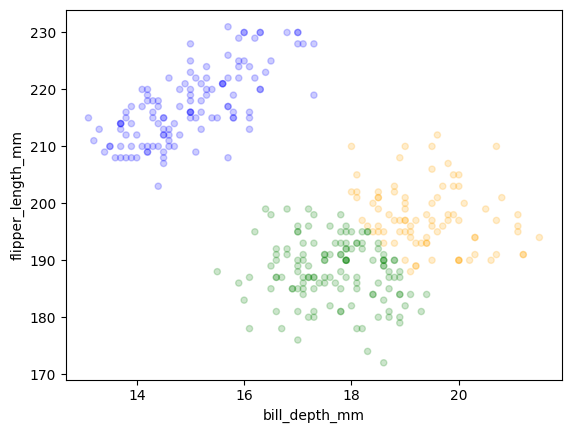

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X_train)

model = KMeans(n_clusters=3)
model.fit(X_train_std)

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue",
    2: "green"
})

X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2)

model.cluster_centers_

`k=3, there is three penguins type(?)`

4\. Consider a penguin with a bill depth of 15 mm and a flipper length of 210 mm. Based on the scatterplot, what cluster should this penguin should be assigned to? Use the model to predict what cluster the penguin is assigned to.

In [ ]:
df_penguins["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

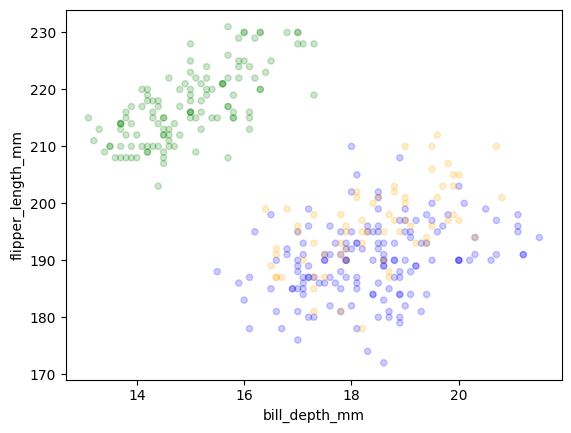

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
species = df_penguins["species"].map({
    "Adelie": "blue",
    "Gentoo": "green",
    "Chinstrap": "orange"
})

X_train = df_penguins[["bill_depth_mm", "flipper_length_mm"]]
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=species, alpha=0.2);

In [ ]:
df_penguins["cluster"] = clusters

pd.crosstab(df_penguins["species"], df_penguins["cluster"])

cluster,blue,green,orange
species,,,
Adelie,1,100,51
Chinstrap,0,32,34
Gentoo,122,1,1


In [ ]:
df_penguins.groupby("species")[["bill_depth_mm", "flipper_length_mm"]].mean()

,bill_depth_mm,flipper_length_mm
species,,
Adelie,18.346358,189.953642
Chinstrap,18.420588,195.823529
Gentoo,14.982114,217.186992


In [ ]:
model.cluster_centers_

array([[ 1.15893121, -0.2268899 ],
       [-1.09998045,  1.15886506],
       [ 0.27454062, -0.91981165]])

## Titanic Data

Use $k$-means to cluster the Titanic passengers into $k$ clusters. You are free to choose the number of clusters $k$, but try at least two different values of $k$. You are also free to choose the features to include, but be sure to include both categorical and quantitative features.

Summarize the results to create "profiles" of the passengers in each cluster. Can you come up with an "interpretation" of each cluster based on the passengers in it?

Note: before we have classified the passengers based on whether or not they survived, but here we are just trying to cluster the passengers; we're not necessarily trying to predict whether they survived or died.

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
df_titanic = pd.read_csv("https://dlsun.github.io/pods/data/titanic.csv")

In [ ]:
df_titanic["gender"] = df_titanic["gender"].map({"male": 0, "female": 1})
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",0,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",0,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",0,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",1,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",1,16.0,3rd,S,Norway,348125.0,7.13,1


In [ ]:
df_titanic["age"].fillna(df_titanic["age"].mean(), inplace=True)
df_titanic["fare"].fillna(df_titanic["fare"].mean(), inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 44.17495396,  31.88626681],
       [ 37.58823529, 240.41720882],
       [ 25.10794712,   9.8308817 ],
       [ 24.59216688,  34.04512444],
       [ 35.51115486,  98.35741654],
       [ 41.5       , 512.0607    ]])

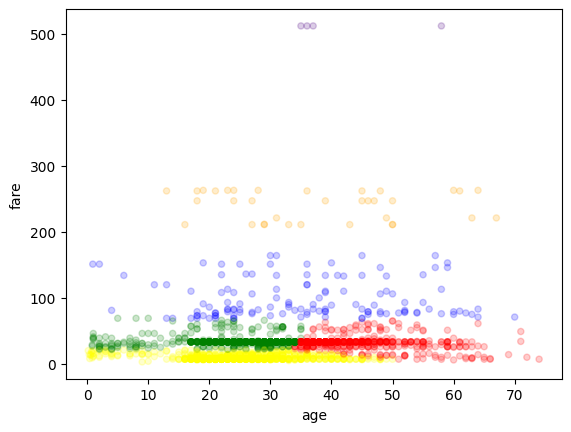

In [ ]:
X_train = df_titanic[["age", "fare"]]

model = KMeans(n_clusters=6)
model.fit(X_train)

clusters = pd.Series(model.labels_).map({
    0: "red",
    1: "orange",
    2: "yellow",
    3: "green",
    4: "blue",
    5: "indigo",
    6: "violet"
})

X_train.plot.scatter(x="age", y="fare",
                     c=clusters, alpha=0.2)

model.cluster_centers_

## "Two Moons" data set

The code below reads in the "two moons" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should be the two clusters be _intuitively_? What do you think $k$-means will return as the clusters? Once you have a hypothesis, test it out by fitting the model to this dataset and plotting the resulting clusters.

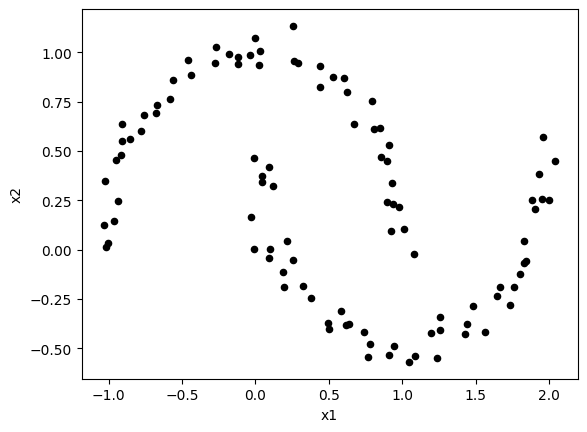

In [ ]:
moons = pd.read_csv("https://dlsun.github.io/pods/data/two_moons.csv")
moons.plot.scatter(x="x1", y="x2", color="black");

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 1.19513147, -0.04954391],
       [-0.23743238,  0.56634832]])

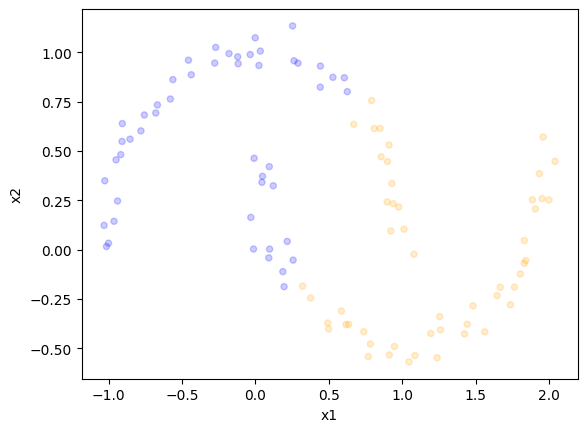

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
model = KMeans(n_clusters=2)
model.fit(moons[["x1", "x2"]])

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue"
})

moons.plot.scatter(x="x1", y="x2",
                   c=clusters, alpha=0.2)

model.cluster_centers_

## "Satellite" data set

The code below reads in the "satellite" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should the two clusters be _intuitively_? What will the clusters be if you ask $k$-means to cluster this data into 2 clusters? Once you have a hypothesis, test it out by running $k$-means on this dataset.

<Axes: xlabel='x1', ylabel='x2'>

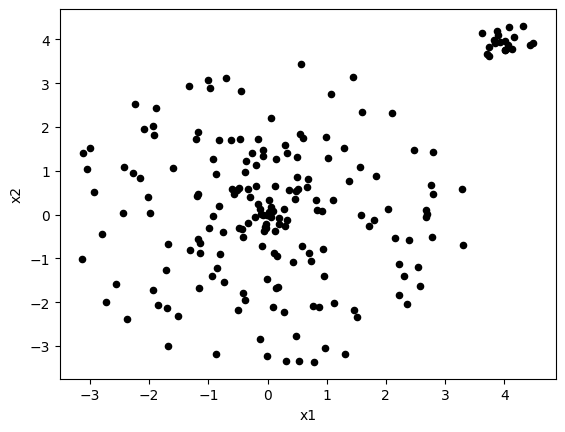

In [ ]:
satellite = pd.read_csv("https://dlsun.github.io/pods/data/satellite.csv")
satellite.plot.scatter(x="x1", y="x2", color="black")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.13222885, -0.13881438],
       [ 3.36253334,  3.24547073]])

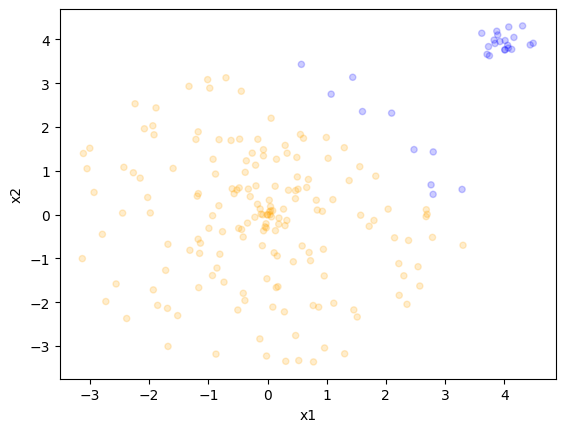

In [ ]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
model = KMeans(n_clusters=2)
model.fit(satellite[["x1", "x2"]])

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue"
})

satellite.plot.scatter(x="x1", y="x2",
                   c=clusters, alpha=0.2)

model.cluster_centers_